In [1]:
import pandas as pd

In [46]:
data = pd.read_csv("./train.csv")
data_test = pd.read_csv("./test.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [24]:
def data_descr(data, data_name=''):
    print(f'The dataset is: {data_name}', end='\n\n')
    display(data.info())
    
    print(f'Statistical information', end='\n\n')
    display(data.describe(include='all'))
    
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('The number of duplicates is', data.duplicated().sum(), '.')
    else:
        print('There are no duplicates in the data')
        
    print('The number of missing values per column in % ')
    report = data.isna().sum() / data.shape[0] * 100
    report = report.to_frame()
    report.rename(columns={0:'missing values in % of total'}, inplace =True)
    display(report)
    
data_descr(data, data_name="Mobile Price Classification")

The dataset is: Mobile Price Classification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g

None

Statistical information



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


There are no duplicates in the data
The number of missing values per column in % 


,missing values in % of total
battery_power,0.0
blue,0.0
clock_speed,0.0
dual_sim,0.0
fc,0.0
four_g,0.0
int_memory,0.0
m_dep,0.0
mobile_wt,0.0
n_cores,0.0


Fontconfig warning: ignoring UTF-8: not a valid region tag


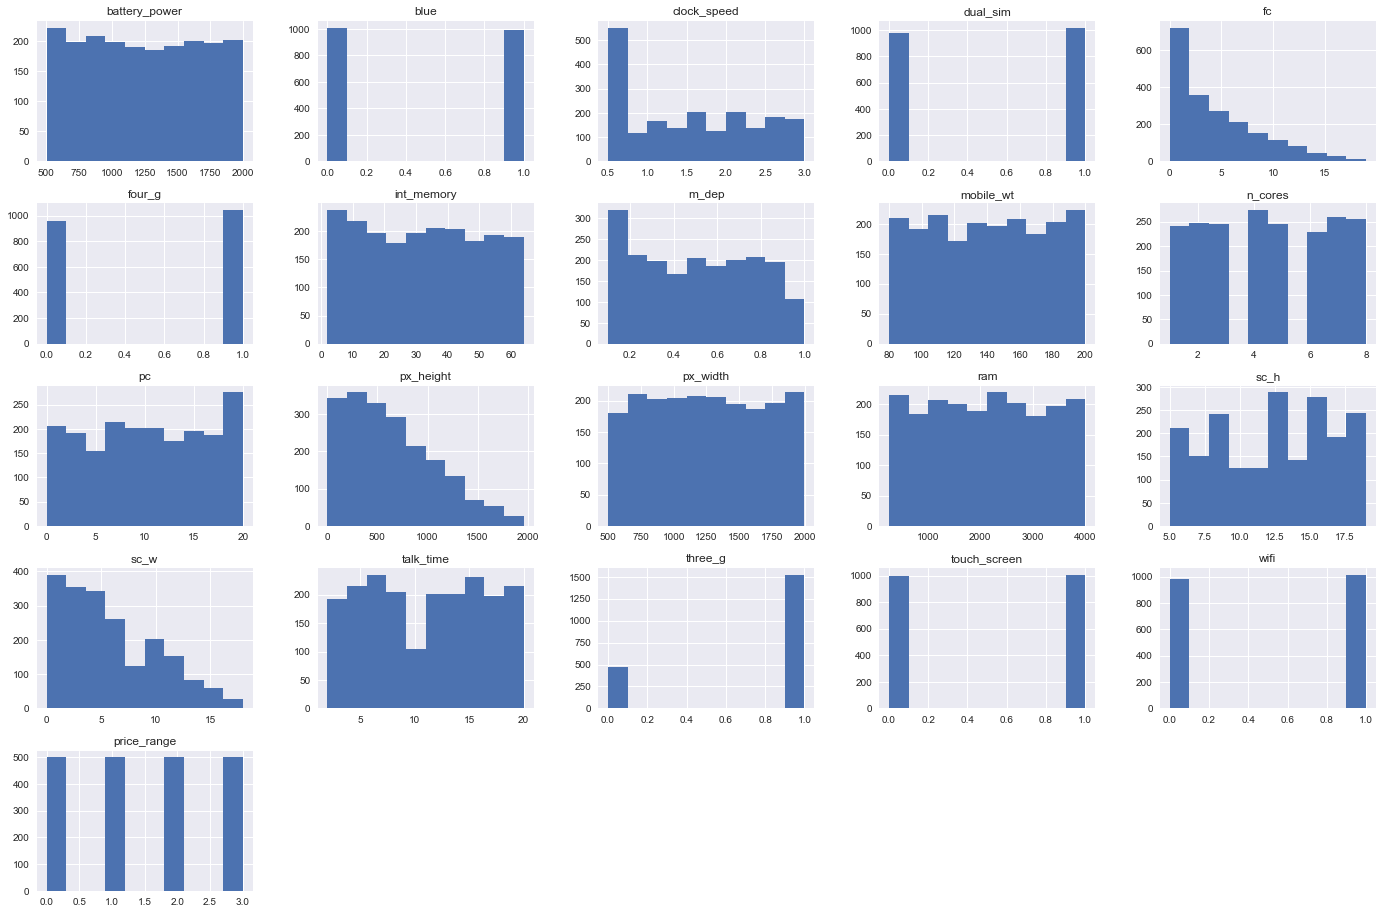

In [39]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
data.hist(figsize = (24, 16))
plt.show()

In [45]:
# import seaborn as sns
# plt.style.use('boxplot')
# data.hist(figsize = (24, 16))
# plt.show()

In [25]:
from plotly.tools import FigureFactory as ff
from plotly.offline import iplot
# import plotly.io as pio
datahead=data.head(10)
datahead=datahead.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
                                   "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
                                   ,"px_height":"Pixel R. Height","px_width":"Pixel R. Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
                                   "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})
colorscale = "Greens"
table = ff.create_table(datahead,colorscale=colorscale,height_constant=40)
table.layout.width=2500
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 8
iplot(table)

/Users/maulaizzaazizi/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:590: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [26]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


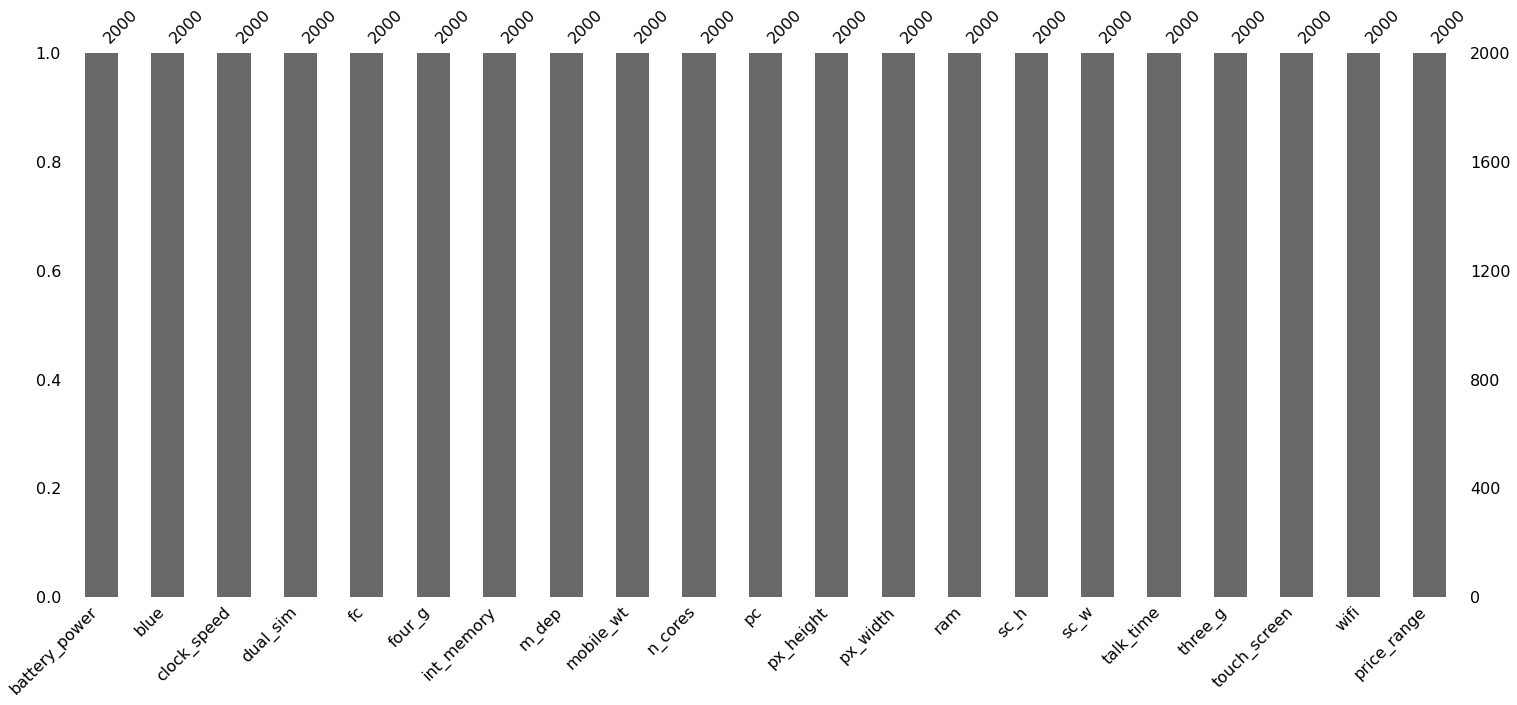

In [27]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

# Correlation between features

Text(0.5, 1.0, 'Correlation ')

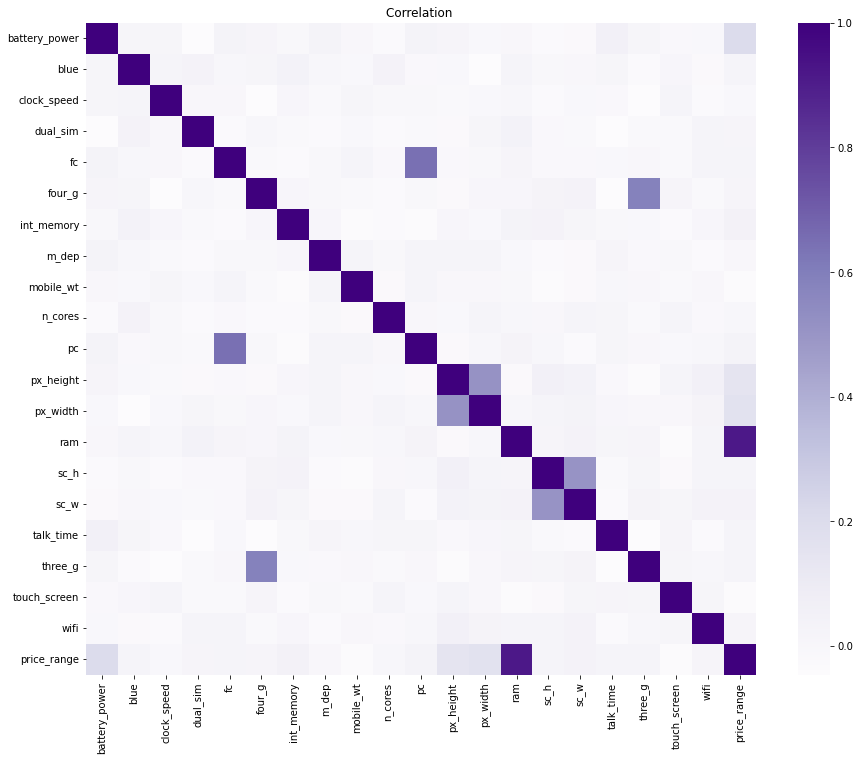

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [29]:
#price range correlation
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

# RAM AND OTHER FEATURES COMPRASION

In [34]:
pip install altair vega_datasets

     |████████████████████████████████| 210 kB 982 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# SVM

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = data.drop('price_range', axis=1)
y = data['price_range']

scaler.fit(x)
x_transformed = scaler.transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_transformed, y, test_size=0.3)

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

lm = LinearRegression()

In [50]:
lm.fit(x_train, y_train)

LinearRegression()

In [51]:
lm.score(x_train, y_train)

0.9167339817540618

In [56]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:98.92857142857143
Test Set Accuracy:88.16666666666667

Confusion Matrix:
[[147   6   0   0]
 [ 19 117  13   0]
 [  0  14 126  13]
 [  0   0   6 139]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       153
           1       0.85      0.79      0.82       149
           2       0.87      0.82      0.85       153
           3       0.91      0.96      0.94       145

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

